In [3]:
import pandas as pd
import pathlib
from sections import get_sections
import upsetplot
import matplotlib.pyplot as plt

C:\Users\alena\anaconda3\envs\biopy\lib\site-packages\upsetplot\plotting.py:684: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  colors = pd.Series([


IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

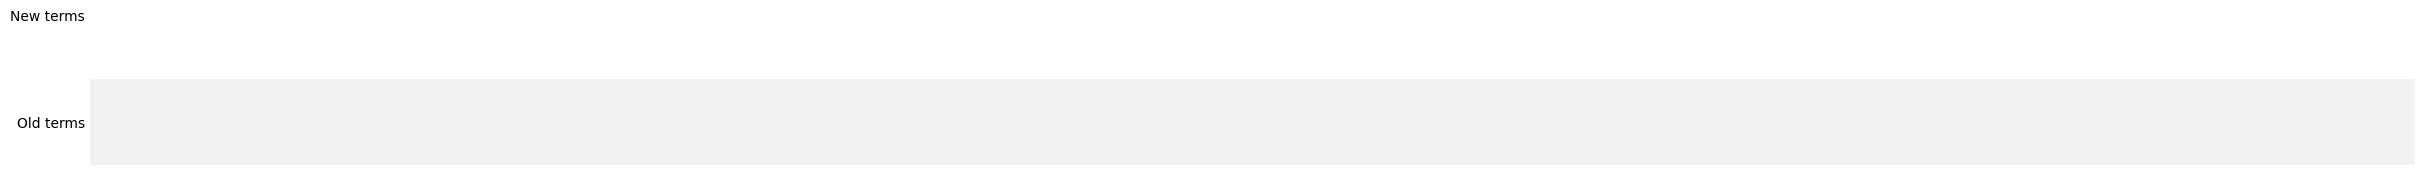

In [11]:
data_path_old = 'E:/YandexDisk/pydnameth/datasets/GPL21145/GSEUNN/special/043_yakutia_EWAS/00_all_region/data_from_R/'
data_path_new = 'E:/YandexDisk/pydnameth/datasets/GPL21145/GSEUNN/special/043_yakutia_EWAS/analysis_without_non_sakha/00_all_region/data_from_R/'

go_old = pd.read_csv(f'{data_path_old}GSEA(methylglm)_GO.csv')
go_old.rename(columns={'Size': 'Size_old', 'pvalue': 'pvalue_old', 'padj': 'padj_old'}, inplace=True)
go_new = pd.read_csv(f'{data_path_new}GSEA(methylglm)_GO_non.csv')
go_new.rename(columns={'Size': 'Size_new', 'pvalue': 'pvalue_new', 'padj': 'padj_new'}, inplace=True)

go_old_pval = go_old[go_old['padj_old'] < 0.05]
go_new_pval = go_new[go_new['padj_new'] < 0.05]
intersection_old_new = pd.merge(go_old_pval, go_new_pval, how='inner', on=['ID', 'Description'], suffixes=('_old', '_new'))

go_old_IDs = set(go_old_pval['ID'])
go_new_IDs = set(go_new_pval['ID'])

go_intersection = go_new_IDs.intersection(go_old_IDs)
go_new_not_old = set(go_new_IDs - go_old_IDs)
go_old_not_new = set(go_old_IDs - go_new_IDs)

In [ ]:
pathlib.Path(f"{data_path_new}/intersection/GO/").mkdir(parents=True, exist_ok=True)
sections = get_sections([set(go_old_IDs), set(go_new_IDs)])
for sec in sections:
    df_sec = pd.merge(go_old[go_old['ID'].isin(list(sections[sec]))], go_new[go_new['ID'].isin(list(sections[sec]))], how='inner', on=['ID', 'Description'], suffixes=('', ''))
    df_sec.set_index('ID', inplace=True)
    df_sec.to_excel(f"{data_path_new}/intersection/GO/{sec}.xlsx")

dict_upset_lists = {
    "Old GO terms": go_old_IDs,
    "New GO terms": go_new_IDs,
}

upset_all = list(set().union(*list(dict_upset_lists.values())))
df_upset = pd.DataFrame(index=upset_all)
for k, v in dict_upset_lists.items():
    df_upset[k] = df_upset.index.isin(v)
df_upset = df_upset.set_index(list(dict_upset_lists.keys()))
tmp = plt.figure(figsize=(30, 10))
upset_fig = upsetplot.UpSet(
    df_upset,
    sort_categories_by='input',
    subset_size='count',
    show_counts=True,
    min_degree=0,
    element_size=None,
    totals_plot_elements=3,
    include_empty_subsets=False
)
upset_fig.plot(tmp)
plt.savefig(f"{data_path_new}/intersection/GO/upset.png", bbox_inches='tight')
plt.savefig(f"{data_path_new}/intersection/GO/upset.pdf", bbox_inches='tight')
plt.close()